In [45]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv("spotify_data.csv")
data

,Songs & Artist,Streams,Daily
0,The Weeknd - Blinding Lights,4463658617,1619447.0
1,Ed Sheeran - Shape of You,4018102402,1001507.0
2,Lewis Capaldi - Someone You Loved,3588673578,1506961.0
3,Harry Styles - As It Was,3544187311,1611374.0
4,Post Malone - Sunflower,3518744128,1337404.0
...,...,...,...
2495,Myke Towers - LA FALDA,505592800,1278450.0
2496,Social House - Magic In The Hamptons,505511969,118483.0
2497,KISS - Rock And Roll All Nite,505386377,205701.0
2498,Mora - 512,505309100,280336.0


In [47]:
# 1. Melihat informasi umum dari dataset
print("Informasi dataset sebelum dibersihkan:")
print(data.info())
print("\nStatistik deskriptif:")
print(data.describe())

Informasi dataset sebelum dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Songs & Artist  2500 non-null   object 
 1   Streams         2500 non-null   int64  
 2   Daily           2498 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB
None

Statistik deskriptif:
            Streams         Daily
count  2.500000e+03  2.498000e+03
mean   9.381437e+08  5.044663e+05
std    4.788772e+08  4.963328e+05
min    5.052491e+08  7.523000e+03
25%    6.099077e+08  2.245135e+05
50%    7.628053e+08  3.763570e+05
75%    1.096878e+09  6.318060e+05
max    4.463659e+09  7.553534e+06


In [48]:
# Menangani nilai kosong pada kolom 'Daily'
median_daily = data['Daily'].median()
data['Daily'].fillna(median_daily, inplace=True)

# Pastikan kolom numerik memiliki tipe data yang benar
data['Streams'] = data['Streams'].astype(int)
data['Daily'] = data['Daily'].astype(int)

# Normalisasi kolom numerik
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Streams', 'Daily']] = scaler.fit_transform(data[['Streams', 'Daily']])

# Tampilkan informasi setelah pembersihan
print("\nInformasi dataset setelah pembersihan:")
print(data.info())
print("\n5 Baris pertama dataset yang sudah dibersihkan:")
print(data.head())



Informasi dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Songs & Artist  2500 non-null   object 
 1   Streams         2500 non-null   float64
 2   Daily           2500 non-null   float64
dtypes: float64(2), object(1)
memory usage: 58.7+ KB
None

5 Baris pertama dataset yang sudah dibersihkan:
                      Songs & Artist   Streams     Daily
0       The Weeknd - Blinding Lights  0.539598  0.213613
1          Ed Sheeran - Shape of You  0.435638  0.131723
2  Lewis Capaldi - Someone You Loved  0.335441  0.198706
3           Harry Styles - As It Was  0.325061  0.212543
4            Post Malone - Sunflower  0.319125  0.176236


In [49]:
# Memeriksa jumlah duplikasi pada dataset
duplicate_count = data.duplicated().sum()
print(f"\nJumlah duplikasi pada dataset: {duplicate_count}")
if duplicate_count > 0:
    data = data.drop_duplicates()
    print(f"Duplikasi dihapus. Dataset sekarang memiliki {len(data)} baris.")



Jumlah duplikasi pada dataset: 0


In [50]:
# 2. Mengidentifikasi nilai kosong dan menghapusnya (atau mengganti dengan nilai tertentu)
print("\nJumlah nilai kosong per kolom:")
print(data.isnull().sum())



Jumlah nilai kosong per kolom:
Songs & Artist    0
Streams           0
Daily             0
dtype: int64


In [51]:
features = data[['Streams', 'Daily']]

In [52]:
k = 3  # Jumlah cluster
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [53]:
data['Cluster'] = kmeans.labels_

In [54]:
import numpy as np

# Hitung rata-rata Streams dan Daily untuk setiap cluster
cluster_summary = data.groupby('Cluster')[['Streams', 'Daily']].mean()

# Urutkan cluster berdasarkan Streams dan Daily (descending)
sorted_clusters = cluster_summary.sort_values(by=['Streams', 'Daily'], ascending=False).index

# Buat mapping ulang untuk memastikan Cluster 0 menjadi "Populer"
new_cluster_map = {cluster: rank for rank, cluster in enumerate(sorted_clusters)}

# Perbarui kolom 'Cluster' sesuai mapping baru
data['Cluster'] = data['Cluster'].map(new_cluster_map)

# Peta kategori setelah mapping ulang
cluster_labels = {
    0: 'Populer',
    1: 'Biasa Saja',
    2: 'Kurang Populer'
}

# Tambahkan kolom 'Kategori' ke dataset
data['Kategori'] = data['Cluster'].map(cluster_labels)

# Cek hasil pengelompokan
print("Mapping Cluster Baru:")
print(new_cluster_map)
print("\nCluster Summary Setelah Mapping Ulang:")
print(data.groupby('Cluster')[['Streams', 'Daily']].mean())


Mapping Cluster Baru:
{2: 0, 0: 1, 1: 2}

Cluster Summary Setelah Mapping Ulang:
          Streams     Daily
Cluster                    
0        0.835940  0.117392
1        0.666593  0.046205
2        0.096035  0.159940


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Menambahkan label cluster ke data pengujian
test_data['Cluster'] = kmeans.predict(test_data[['Streams', 'Daily']])

# Hitung rata-rata Streams dan Daily untuk setiap cluster
cluster_summary = test_data.groupby('Cluster')[['Streams', 'Daily']].mean()

# Urutkan cluster berdasarkan Streams dan Daily (descending)
sorted_clusters = cluster_summary.sort_values(by=['Streams', 'Daily'], ascending=False).index

# Buat mapping ulang untuk memastikan Cluster 0 menjadi "Populer"
new_cluster_map = {cluster: rank for rank, cluster in enumerate(sorted_clusters)}

# Perbarui kolom 'Cluster' sesuai mapping baru
test_data['Cluster'] = test_data['Cluster'].map(new_cluster_map)

# Peta kategori setelah mapping ulang
cluster_labels = {
    0: 'Populer',
    1: 'Biasa Saja',
    2: 'Kurang Populer'
}

# Tambahkan kolom 'Kategori' ke dataset
test_data['Kategori'] = test_data['Cluster'].map(cluster_labels)

# Cek hasil pengelompokan
print("\nMapping Cluster Baru:")
print(new_cluster_map)
print("\nCluster Summary Setelah Mapping Ulang:")
print(test_data.groupby('Cluster')[['Streams', 'Daily']].mean())




Mapping Cluster Baru:
{2: 0, 0: 1, 1: 2}

Cluster Summary Setelah Mapping Ulang:
          Streams     Daily
Cluster                    
0        0.833938  0.105580
1        0.665310  0.046438
2        0.043156  0.155125


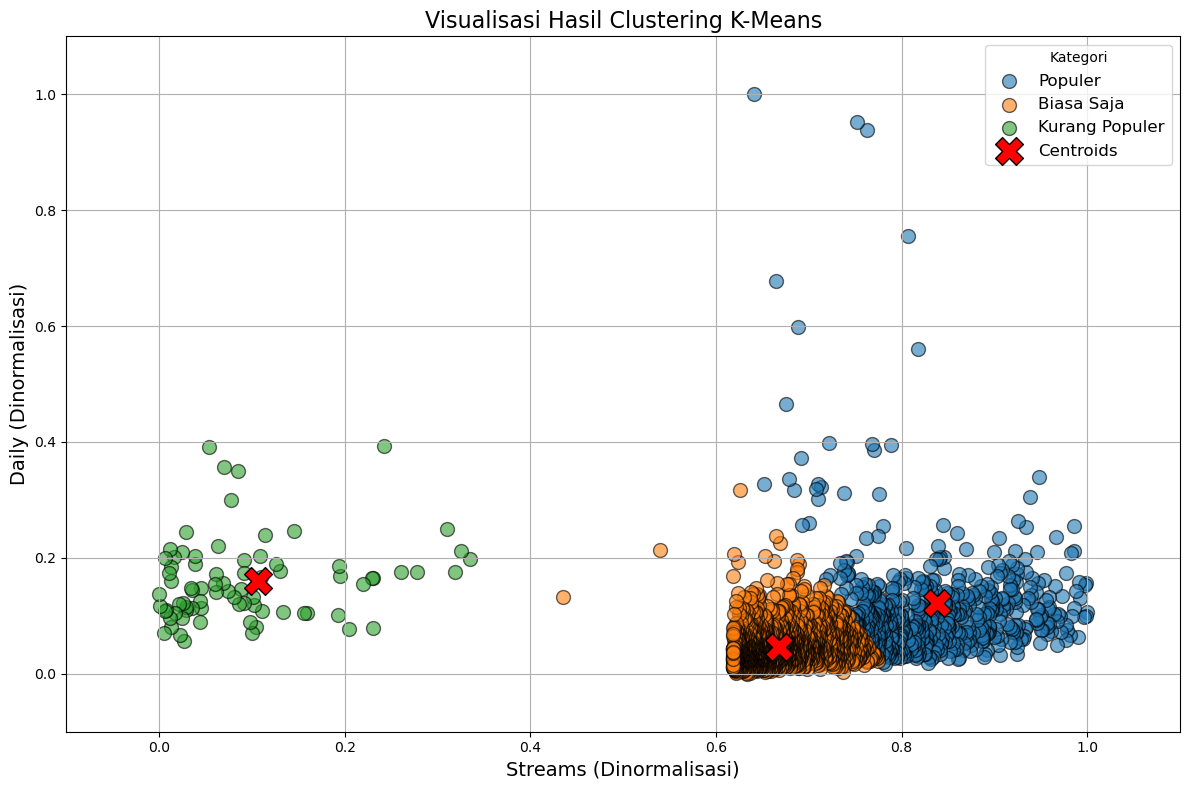

In [56]:
# Visualisasi hasil clustering setelah penyesuaian
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'orange']  # Warna untuk kategori
for cluster in sorted(new_cluster_map.values()):  # Menggunakan cluster yang sudah disesuaikan
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Streams'], 
        cluster_data['Daily'], 
        label=cluster_labels[cluster], 
        alpha=0.6, 
        s=100,  # Ukuran titik
        edgecolor='k'  # Garis tepi
    )

# Plot centroid (tidak berubah karena hanya mapping ulang cluster)
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=400, 
    c='red', 
    marker='X', 
    label='Centroids', 
    edgecolor='black'
)

# Menambahkan elemen visualisasi
plt.title('Visualisasi Hasil Clustering K-Means', fontsize=16)
plt.xlabel('Streams (Dinormalisasi)', fontsize=14)
plt.ylabel('Daily (Dinormalisasi)', fontsize=14)
plt.legend(title='Kategori', fontsize=12)
plt.grid(True)
plt.xlim(-0.1, 1.1)  # Mengatur batas sumbu x
plt.ylim(-0.1, 1.1)  # Mengatur batas sumbu y
plt.tight_layout()

plt.show()


In [58]:
import pandas as pd

# Menyimpan hasil clustering ke file CSV
data['Cluster'] = data['Cluster']  # Pastikan kolom Cluster sesuai dengan hasil akhir clustering
data['Kategori'] = data['Cluster'].map(cluster_labels)  # Mapping kategori sesuai label

# Simpan ke CSV dengan nama file baru
data.to_csv('clustered_music_data_updated.csv', index=False)
print("Hasil clustering berhasil disimpan ke file 'clustered_music_data_updated.csv'")

# Membaca kembali file untuk validasi
clustered_music_data_updated = pd.read_csv("clustered_music_data_updated.csv", sep=",")

clustered_music_data_updated

Hasil clustering berhasil disimpan ke file 'clustered_music_data_updated.csv'


,Songs & Artist,Streams,Daily,Cluster,Kategori
0,The Weeknd - Blinding Lights,0.539598,0.213613,1,Biasa Saja
1,Ed Sheeran - Shape of You,0.435638,0.131723,1,Biasa Saja
2,Lewis Capaldi - Someone You Loved,0.335441,0.198706,2,Kurang Populer
3,Harry Styles - As It Was,0.325061,0.212543,2,Kurang Populer
4,Post Malone - Sunflower,0.319125,0.176236,2,Kurang Populer
...,...,...,...,...,...
2495,Myke Towers - LA FALDA,0.618207,0.168424,1,Biasa Saja
2496,Social House - Magic In The Hamptons,0.618188,0.014704,1,Biasa Saja
2497,KISS - Rock And Roll All Nite,0.618158,0.026263,1,Biasa Saja
2498,Mora - 512,0.618140,0.036153,1,Biasa Saja


In [35]:
# Membuat ringkasan klaster
cluster_summary = data.groupby('Kategori').agg(
    Jumlah_Data=('Kategori', 'size'),
    Rata2_Streams=('Streams', 'mean'),
    Rata2_Daily=('Daily', 'mean')
).reset_index()

# Menampilkan ringkasan klaster
print("Ringkasan Klaster:")
print(cluster_summary)

# Menyimpan ringkasan klaster ke file CSV
cluster_summary.to_csv('cluster_summary.csv', index=False)
print("Ringkasan klaster berhasil disimpan ke file 'cluster_summary.csv'")


Ringkasan Klaster:
         Kategori  Jumlah_Data  Rata2_Streams  Rata2_Daily
0      Biasa Saja         1857       0.666593     0.046205
1  Kurang Populer           78       0.096035     0.159940
2         Populer          565       0.835940     0.117392
Ringkasan klaster berhasil disimpan ke file 'cluster_summary.csv'


In [36]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(features, kmeans.labels_)
davies_bouldin = davies_bouldin_score(features, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.6094572468830352
Davies-Bouldin Index: 0.5642247685247256


## PENGUJIAN

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mengimpor dataset Spotify
data = pd.read_csv('spotify_dataa.csv')  # Sesuaikan dengan nama file dataset Anda

# Menampilkan info dataset untuk verifikasi
print("Dataset dimuat dengan kolom-kolom berikut:")
print(data.columns)

# Menangani nilai kosong pada kolom 'Daily'
median_daily = data['Daily'].median()
data['Daily'].fillna(median_daily, inplace=True)

# Pastikan kolom numerik memiliki tipe data yang benar
data['Streams'] = data['Streams'].astype(int)
data['Daily'] = data['Daily'].astype(int)

# Normalisasi kolom numerik
scaler = MinMaxScaler()
data[['Streams', 'Daily']] = scaler.fit_transform(data[['Streams', 'Daily']])

# Menampilkan informasi setelah pembersihan
print("\nInformasi dataset setelah pembersihan:")
print(data.info())
print("\n5 Baris pertama dataset yang sudah dibersihkan:")
print(data.head())

# Memisahkan fitur yang akan digunakan untuk clustering (tetap mempertahankan kolom 'Songs & Artist')
features = data[['Songs & Artist', 'Streams', 'Daily']]

# Memisahkan data menjadi data pelatihan dan data pengujian
train_data, test_data = train_test_split(features, test_size=0.2, random_state=42)

# Menampilkan informasi jumlah data pelatihan dan pengujian
print("\nData telah berhasil dipisahkan.")
print(f"Jumlah data pelatihan: {len(train_data)}, Jumlah data pengujian: {len(test_data)}")

# Menampilkan beberapa data pelatihan
print("\nBeberapa data pelatihan:")
print(train_data.head())

# Menampilkan beberapa data pengujian
print("\nBeberapa data pengujian:")
print(test_data.head())


Dataset dimuat dengan kolom-kolom berikut:
Index(['Songs & Artist', 'Streams', 'Daily'], dtype='object')

Informasi dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Songs & Artist  2500 non-null   object 
 1   Streams         2500 non-null   float64
 2   Daily           2500 non-null   float64
dtypes: float64(2), object(1)
memory usage: 58.7+ KB
None

5 Baris pertama dataset yang sudah dibersihkan:
                      Songs & Artist   Streams     Daily
0       The Weeknd - Blinding Lights  0.539598  0.213613
1          Ed Sheeran - Shape of You  0.435638  0.131723
2  Lewis Capaldi - Someone You Loved  0.335441  0.198706
3           Harry Styles - As It Was  0.325061  0.212543
4            Post Malone - Sunflower  0.319125  0.176236

Data telah berhasil dipisahkan.
Jumlah data pelatihan: 2000, Jumlah data p

In [38]:
#Menentukan jumlah cluster
k = 3  # Jumlah cluster
kmeans = KMeans(n_clusters=k, random_state=42)

# Melatih model dengan data pelatihan menggunakan hanya fitur numerik (Streams dan Daily)
kmeans.fit(train_data[['Streams', 'Daily']])


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)


Mapping Cluster Baru:
{2: 0, 0: 1, 1: 2}

Cluster Summary Setelah Mapping Ulang:
          Streams     Daily
Cluster                    
0        0.835991  0.106610
1        0.666053  0.046608
2        0.043156  0.155125


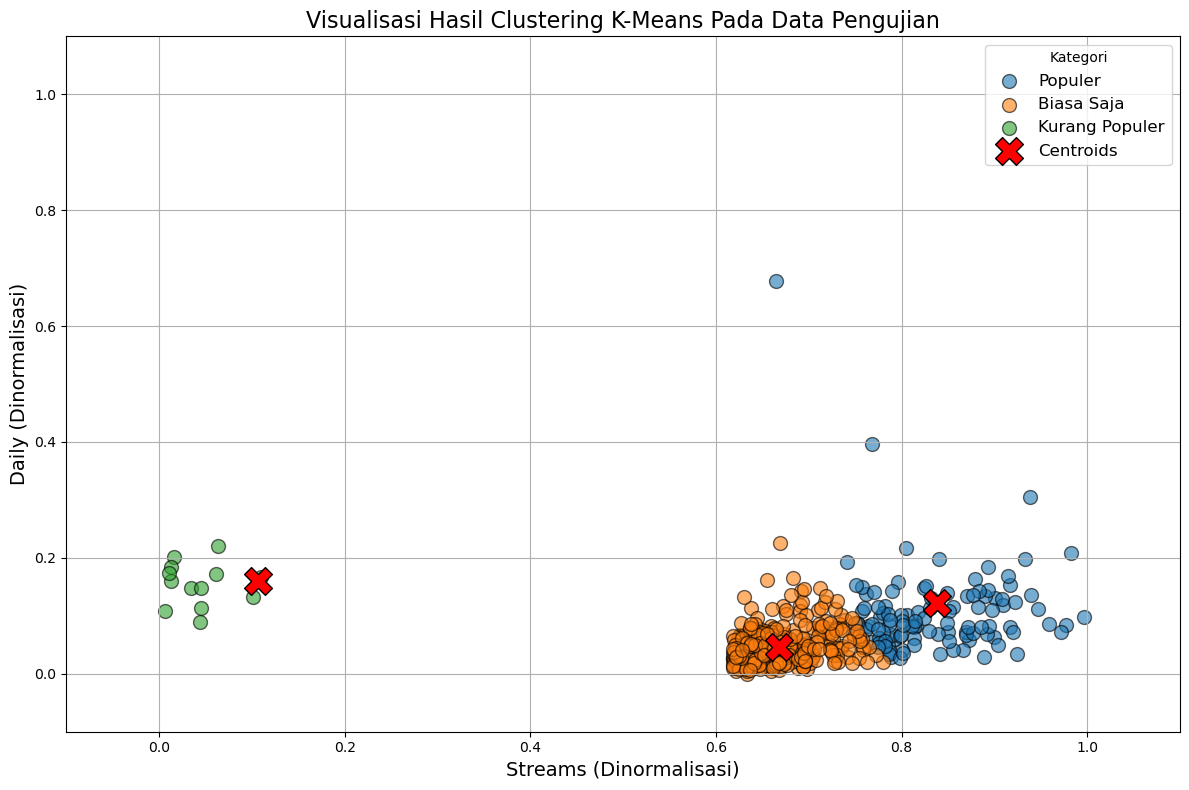


Data telah disimpan sebagai 'test_data_with_categories.csv'


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Menambahkan label cluster ke data pengujian
test_data['Cluster'] = kmeans.predict(test_data[['Streams', 'Daily']])
# Hitung rata-rata Streams dan Daily untuk setiap cluster
cluster_summary = test_data.groupby('Cluster')[['Streams', 'Daily']].mean()
# Urutkan cluster berdasarkan Streams dan Daily (descending)
sorted_clusters = cluster_summary.sort_values(by=['Streams', 'Daily'], ascending=False).index
# Buat mapping ulang untuk memastikan Cluster 0 menjadi "Populer"
new_cluster_map = {cluster: rank for rank, cluster in enumerate(sorted_clusters)}
# Perbarui kolom 'Cluster' sesuai mapping baru
test_data['Cluster'] = test_data['Cluster'].map(new_cluster_map)
# Peta kategori setelah mapping ulang
cluster_labels = {
    0: 'Populer',
    1: 'Biasa Saja',
    2: 'Kurang Populer'}
# Tambahkan kolom 'Kategori' ke dataset
test_data['Kategori'] = test_data['Cluster'].map(cluster_labels)
# Cek hasil pengelompokan
print("\nMapping Cluster Baru:")
print(new_cluster_map)
print("\nCluster Summary Setelah Mapping Ulang:")
print(test_data.groupby('Cluster')[['Streams', 'Daily']].mean())
# Visualisasi hasil clustering setelah penyesuaian
plt.figure(figsize=(12, 8))
colors = ['blue', 'green', 'orange']  # Warna untuk kategori
for cluster in sorted(new_cluster_map.values()):  # Menggunakan cluster yang sudah disesuaikan
    cluster_data = test_data[test_data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Streams'], 
        cluster_data['Daily'], 
        label=cluster_labels[cluster], 
        alpha=0.6, 
        s=100,  # Ukuran titik
        edgecolor='k'  # Garis tepi
    )
# Plot centroid (tidak berubah karena hanya mapping ulang cluster)
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=400, 
    c='red', 
    marker='X', 
    label='Centroids', 
    edgecolor='black'
)
# Menambahkan elemen visualisasi
plt.title('Visualisasi Hasil Clustering K-Means Pada Data Pengujian', fontsize=16)
plt.xlabel('Streams (Dinormalisasi)', fontsize=14)
plt.ylabel('Daily (Dinormalisasi)', fontsize=14)
plt.legend(title='Kategori', fontsize=12)
plt.grid(True)
plt.xlim(-0.1, 1.1)  # Mengatur batas sumbu x
plt.ylim(-0.1, 1.1)  # Mengatur batas sumbu y
plt.tight_layout()
plt.show()
# Jika Anda ingin menyimpan data dengan label kategori, Anda dapat melakukannya dengan CSV:
test_data.to_csv('test_data_with_categories.csv', index=False)

print("\nData telah disimpan sebagai 'test_data_with_categories.csv'")


In [40]:
# Membuat ringkasan klaster berdasarkan kategori
cluster_summary = test_data.groupby('Kategori').agg(
    Jumlah_Data=('Kategori', 'size'),    # Menghitung jumlah data untuk setiap kategori
    Rata2_Streams=('Streams', 'mean'),    # Menghitung rata-rata Streams untuk setiap kategori
    Rata2_Daily=('Daily', 'mean')        # Menghitung rata-rata Daily untuk setiap kategori
).reset_index()

# Menampilkan ringkasan klaster
print("\nRingkasan Klaster:")
print(cluster_summary)

# Menyimpan ringkasan klaster ke file CSV
cluster_summary.to_csv('cluster_summary_pengujian.csv', index=False)
print("\nRingkasan klaster berhasil disimpan ke file 'cluster_summary_pengujian.csv'")



Ringkasan Klaster:
         Kategori  Jumlah_Data  Rata2_Streams  Rata2_Daily
0      Biasa Saja          377       0.666053     0.046608
1  Kurang Populer           13       0.043156     0.155125
2         Populer          110       0.835991     0.106610

Ringkasan klaster berhasil disimpan ke file 'cluster_summary_pengujian.csv'


In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Menggunakan metrik untuk mengevaluasi hasil clustering pada data pelatihan
silhouette_avg = silhouette_score(test_data[['Streams', 'Daily']], test_data['Cluster'])
davies_bouldin = davies_bouldin_score(test_data[['Streams', 'Daily']], test_data['Cluster'])

# Menampilkan hasil evaluasi
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.6231593916796753
Davies-Bouldin Index: 0.4885352389332442


In [42]:
test_data


,Songs & Artist,Streams,Daily,Cluster,Kategori
1447,Taylor Swift - Getaway Car,0.665116,0.042467,1,Biasa Saja
1114,Adele - Love In The Dark,0.690558,0.118017,1,Biasa Saja
1064,Fifth Harmony - Worth It,0.695095,0.025936,1,Biasa Saja
2287,"Four Tops - I Can't Help Myself (Sugar Pie, Ho...",0.625250,0.036205,1,Biasa Saja
1537,SYML - Where's My Love,0.659180,0.082454,1,Biasa Saja
...,...,...,...,...,...
2375,Calibre 50 - Si Te Pudiera Mentir,0.621735,0.028608,1,Biasa Saja
1609,"Tyler, The Creator - NEW MAGIC WAND",0.654488,0.069228,1,Biasa Saja
596,Skrillex - Where Are Ü Now,0.762383,0.019798,1,Biasa Saja
84,Camila Cabello - Havana,0.996917,0.098666,0,Populer
